In [1]:
data_train = catalog.load("data_train")

                    INFO     Loading data from data_train (ParquetDataset)...                   ]8;id=232689;file:///home/rosana/.conda/envs/PD_env_1/lib/python3.11/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=956416;file:///home/rosana/.conda/envs/PD_env_1/lib/python3.11/site-packages/kedro/io/data_catalog.py#401\401]8;;\

In [2]:
data_test = catalog.load("data_test")
data_test

                    INFO     Loading data from data_test (ParquetDataset)...                    ]8;id=692791;file:///home/rosana/.conda/envs/PD_env_1/lib/python3.11/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=409898;file:///home/rosana/.conda/envs/PD_env_1/lib/python3.11/site-packages/kedro/io/data_catalog.py#401\401]8;;\

,minutes_remaining,period,playoffs,shot_distance,lat_quadra,lon_quadra,shot_made_flag
13437,4,2,False,6,-0.060,0.007,1.0
13618,7,1,False,7,-0.067,0.026,0.0
7918,10,3,False,18,-0.115,0.149,0.0
704,5,2,False,0,0.000,0.000,0.0
14038,6,1,False,22,-0.214,-0.068,0.0
...,...,...,...,...,...,...,...
15813,4,3,False,11,-0.070,-0.094,0.0
5769,5,2,False,15,0.031,0.153,0.0
5570,11,1,False,13,-0.053,-0.120,0.0
13374,5,2,False,14,-0.132,0.070,1.0


In [3]:
data_train_x = data_train.drop('shot_made_flag', axis=1)
data_train_y = data_train[['shot_made_flag']]

data_test_x = data_test.drop('shot_made_flag', axis=1)
data_test_y = data_test[['shot_made_flag']]

In [4]:
from pycaret.classification import *
exp_dt = ClassificationExperiment()
exp_dt.setup(data=data_train, target='shot_made_flag', session_id=3128)

model_dt = exp_dt.create_model('dt')

randcv_model_dt = exp_dt.tune_model(model_dt, n_iter=100, optimize='F1')


,Description,Value
0,Session id,3128
1,Target,shot_made_flag
2,Target type,Binary
3,Original data shape,"(16228, 7)"
4,Transformed data shape,"(16228, 7)"
5,Transformed train set shape,"(11359, 7)"
6,Transformed test set shape,"(4869, 7)"
7,Numeric features,5
8,Preprocess,True
9,Imputation type,simple


<IPython.core.display.HTML object>

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5502,0.5352,0.5893,0.5263,0.5560,0.1031,0.1038
1,0.5511,0.5348,0.6096,0.5262,0.5648,0.1063,0.1076
2,0.5361,0.5103,0.5646,0.5126,0.5373,0.0743,0.0747
3,0.5308,0.5068,0.5683,0.5074,0.5361,0.0646,0.0650
4,0.5211,0.5020,0.5683,0.4984,0.5310,0.0461,0.0465
5,0.5106,0.5019,0.5480,0.4885,0.5165,0.0243,0.0244
6,0.5317,0.5101,0.5646,0.5083,0.5350,0.0659,0.0663
7,0.5273,0.5072,0.5701,0.5041,0.5351,0.0580,0.0584
8,0.5167,0.4934,0.5554,0.4943,0.5230,0.0366,0.0369


<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5440,0.5696,0.5175,0.5233,0.5204,0.0858,0.0858
1,0.5484,0.5553,0.5175,0.5282,0.5228,0.0943,0.0943
2,0.5757,0.5821,0.4871,0.5641,0.5228,0.1445,0.1458
3,0.5898,0.5985,0.5406,0.5745,0.5570,0.1757,0.1760
4,0.5704,0.5703,0.5480,0.5500,0.5490,0.1389,0.1389
5,0.5343,0.5438,0.4705,0.5131,0.4909,0.0633,0.0635
6,0.5590,0.5540,0.4760,0.5432,0.5074,0.1113,0.1121
7,0.5449,0.5396,0.5055,0.5239,0.5146,0.0865,0.0865
8,0.5643,0.5666,0.4631,0.5516,0.5035,0.1205,0.1220


<IPython.core.display.HTML object>

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Decision Tree Classifier,0.5317,0.5105,0.5818,0.5083,0.5426,0.0673,0.0679


AUC of best-tuned model: 0.5105


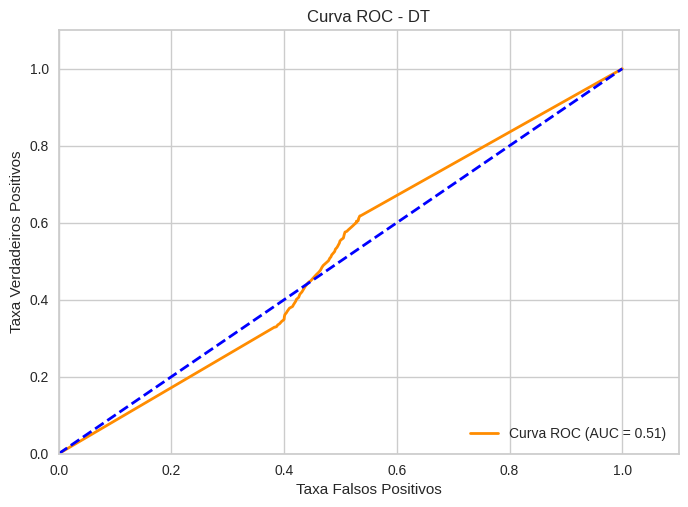

In [14]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

predictions = exp_dt.predict_model(randcv_model_dt, data=data_test)

y_true = data_test_y  
y_scores = randcv_model_dt.predict_proba(data_test_x)[:, 1]

fpr, tpr, _ = roc_curve(y_true, y_scores)
auc_score = roc_auc_score(y_true, y_scores)

print(f"AUC of best-tuned model: {auc_score:.4f}")

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'Curva ROC (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')
plt.xlim([0.0, 1.10])
plt.ylim([0.0, 1.10])
plt.xlabel('Taxa Falsos Positivos')
plt.ylabel('Taxa Verdadeiros Positivos')
plt.title(f'Curva ROC - DT')
plt.legend(loc="lower right")
    
plt.show()

In [15]:
from pycaret.classification import *
exp_rl = ClassificationExperiment()
exp_rl.setup(data=data_train, target='shot_made_flag', session_id=3128)

model_rl = exp_rl.create_model('lr')

randcv_model_rl = exp_rl.tune_model(model_rl, n_iter=100, optimize='F1')


,Description,Value
0,Session id,3128
1,Target,shot_made_flag
2,Target type,Binary
3,Original data shape,"(16228, 7)"
4,Transformed data shape,"(16228, 7)"
5,Transformed train set shape,"(11359, 7)"
6,Transformed test set shape,"(4869, 7)"
7,Numeric features,5
8,Preprocess,True
9,Imputation type,simple


<IPython.core.display.HTML object>

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5731,0.5991,0.4788,0.5628,0.5174,0.1391,0.1405
1,0.5757,0.6019,0.5120,0.5616,0.5356,0.1466,0.1471
2,0.5845,0.6078,0.4705,0.5795,0.5193,0.1604,0.1631
3,0.6118,0.6269,0.5258,0.6077,0.5638,0.2173,0.2192
4,0.5423,0.5746,0.4502,0.5236,0.4841,0.0769,0.0776
5,0.5651,0.5814,0.4779,0.5511,0.5119,0.1234,0.1244
6,0.5590,0.5793,0.4262,0.5487,0.4798,0.1074,0.1100
7,0.5898,0.6022,0.4982,0.5819,0.5368,0.1726,0.1743
8,0.5590,0.5703,0.4742,0.5433,0.5064,0.1112,0.1120


<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5748,0.5986,0.5378,0.5573,0.5473,0.1467,0.1468
1,0.5634,0.6020,0.5562,0.5422,0.5491,0.1260,0.1261
2,0.5845,0.6087,0.5314,0.5692,0.5496,0.1648,0.1652
3,0.6083,0.6275,0.5756,0.5920,0.5837,0.2140,0.2140
4,0.5537,0.5749,0.5074,0.5340,0.5203,0.1036,0.1037
5,0.5660,0.5800,0.5240,0.5472,0.5353,0.1286,0.1287
6,0.5467,0.5804,0.4760,0.5276,0.5005,0.0875,0.0879
7,0.5757,0.6026,0.5443,0.5566,0.5504,0.1488,0.1488
8,0.5475,0.5702,0.5129,0.5265,0.5196,0.0921,0.0922


<IPython.core.display.HTML object>

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,0.5684,0.5926,0.5328,0.5495,0.5410,0.1339,0.1340


AUC of best-tuned model: 0.5926


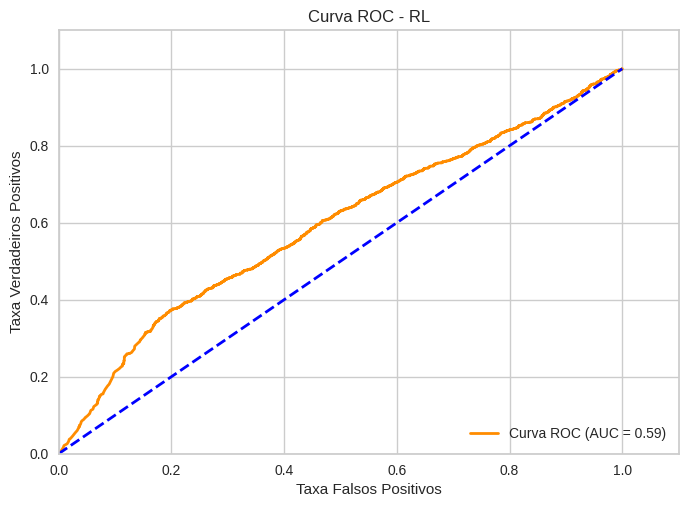

In [16]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

predictions = exp_rl.predict_model(randcv_model_rl, data=data_test)

y_true = data_test_y  
y_scores = randcv_model_rl.predict_proba(data_test_x)[:, 1]

fpr, tpr, _ = roc_curve(y_true, y_scores)
auc_score = roc_auc_score(y_true, y_scores)

print(f"AUC of best-tuned model: {auc_score:.4f}")

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'Curva ROC (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')
plt.xlim([0.0, 1.10])
plt.ylim([0.0, 1.10])
plt.xlabel('Taxa Falsos Positivos')
plt.ylabel('Taxa Verdadeiros Positivos')
plt.title(f'Curva ROC - RL')
plt.legend(loc="lower right")
    
plt.show()